In this Jupyter notebook, we are conducting an exploratory analysis of the daily exchange rates between the Euro and the US dollar from 1999 to 2022. The primary objective of this analysis is to study the trend in the exchange rate over the years, especially focusing on instances when the value of the US dollar exceeded the Euro. We will be utilizing the Pandas library for data manipulation and analysis, and Matplotlib for data visualization.

In [ ]:
import pandas as pd

df = pd.read_csv('euro-daily-hist_1999_2022.csv')
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6147 non-null   object 
 1   [Australian dollar ]      6147 non-null   object 
 2   [Bulgarian lev ]          5745 non-null   object 
 3   [Brazilian real ]         5879 non-null   object 
 4   [Canadian dollar ]        6147 non-null   object 
 5   [Swiss franc ]            6147 non-null   object 
 6   [Chinese yuan renminbi ]  5879 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6147 non-null   object 
 9   [Danish krone ]           6147 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6147 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6147 non-null   object 
 14  [Croatia

In [ ]:
df.rename(columns={'[US dollar ]': 'USD', 'Period\\Unit:': 'Time'},inplace=True)
df.head()
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time',inplace = True)
df.reset_index(drop=True,inplace=True)
df.head()

In [ ]:
euro_to_dollar = df[['Time','USD']].copy()
df['USD'].value_counts() #62 '-' characters

In [ ]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['USD'] != '-']
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 0 to 6146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6085 non-null   datetime64[ns]
 1   USD     6085 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 142.6 KB


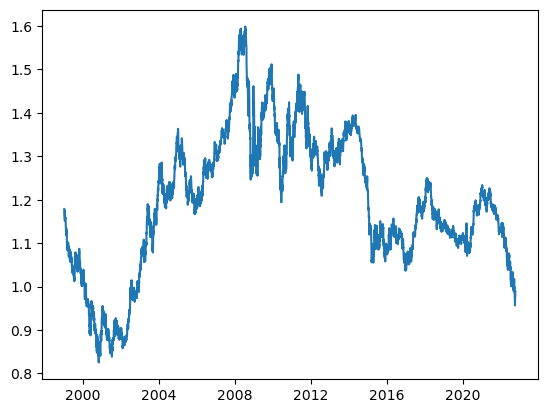

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'],euro_to_dollar['USD'])
plt.show()

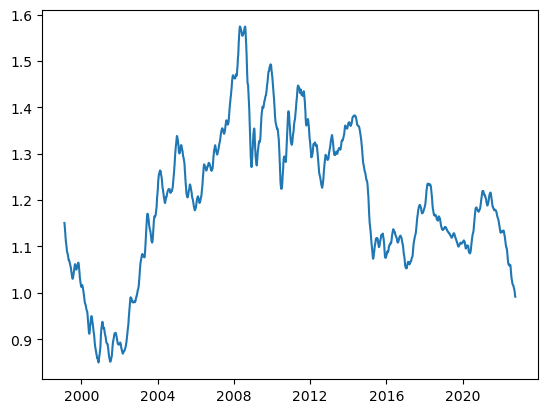

In [ ]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['USD'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'])

USD worth more than EUR for the first time in 20 years 

In [ ]:
UsdOverEur = euro_to_dollar.copy()[euro_to_dollar['USD'] < 1]
print(UsdOverEur)

           Time     USD  rolling_mean
278  2000-01-27  0.9976      1.014457
279  2000-01-28  0.9848      1.013463
280  2000-01-31  0.9791      1.012340
281  2000-02-01  0.9710      1.011053
282  2000-02-02  0.9717      1.009830
283  2000-02-03  0.9748      1.008743
284  2000-02-04  0.9835      1.007897
285  2000-02-07  0.9767      1.006647
286  2000-02-08  0.9903      1.005877
287  2000-02-09  0.9934      1.005360
288  2000-02-10  0.9868      1.004680
289  2000-02-11  0.9801      1.003863
290  2000-02-14  0.9867      1.003120
291  2000-02-15  0.9778      1.001363
292  2000-02-16  0.9804      0.999483
293  2000-02-17  0.9919      0.997920
294  2000-02-18  0.9857      0.996497
295  2000-02-21  0.9857      0.995257
298  2000-02-24  0.9898      0.992417
299  2000-02-25  0.9813      0.991043
300  2000-02-28  0.9639      0.989527
301  2000-02-29  0.9714      0.988263
302  2000-03-01  0.9667      0.986803
303  2000-03-02  0.9725      0.985590
304  2000-03-03  0.9659      0.984130
305  2000-03

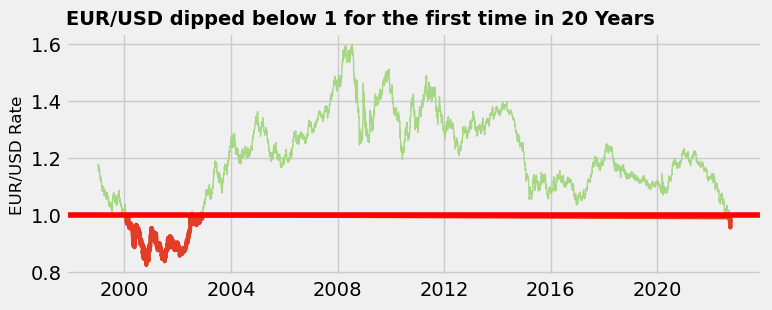

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(euro_to_dollar['Time'], euro_to_dollar['USD'],linewidth=1, color='#A6D785')
ax.plot(UsdOverEur['Time'], UsdOverEur['USD'],linewidth=3, color='#e23d28')
plt.axhline(y=1, color='r', linestyle='-')

plt.title('EUR/USD dipped below 1 for the first time in 20 Years', loc='left',weight='bold',fontsize = '14')

plt.ylabel('EUR/USD Rate',fontsize = '12')
 
plt.show()




Through this analysis, we've tracked the exchange rate between the Euro and the US dollar over the course of more than two decades. Our visualizations showed the fluctuations in exchange rates over time. We successfully identified the rare instances when the value of the USD exceeded the EUR for the first time in 20 years. The highlight of this analysis was plotting these instances on the graph, which provides a clear visualization of the times when the EUR/USD exchange rate dipped below 1. This notebook demonstrates a robust way of processing and visualizing time-series data, providing valuable insights into the dynamics of the foreign exchange market. Future work could extend this analysis to other currency pairs or delve into the causes behind major fluctuations.




